In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas dataframe
df = pd.read_csv('/Users/sohrabtellaie/Documents/GitHub/PrinciplesOfDataScienceCity/week03/accord_sedan.csv')

# Display the first few rows of the dataframe
df.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


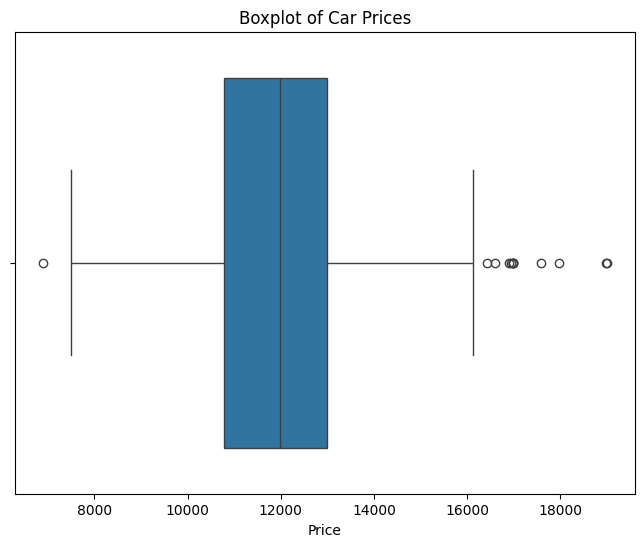

In [4]:
# Boxplot to show the distribution of car prices and potential outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.show()

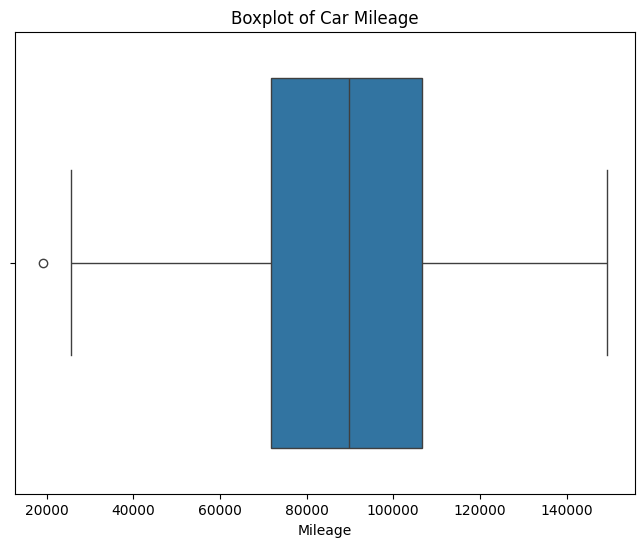

In [5]:
# Boxplot to show the distribution of car mileage and potential outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['mileage'])
plt.title('Boxplot of Car Mileage')
plt.xlabel('Mileage')
plt.show()

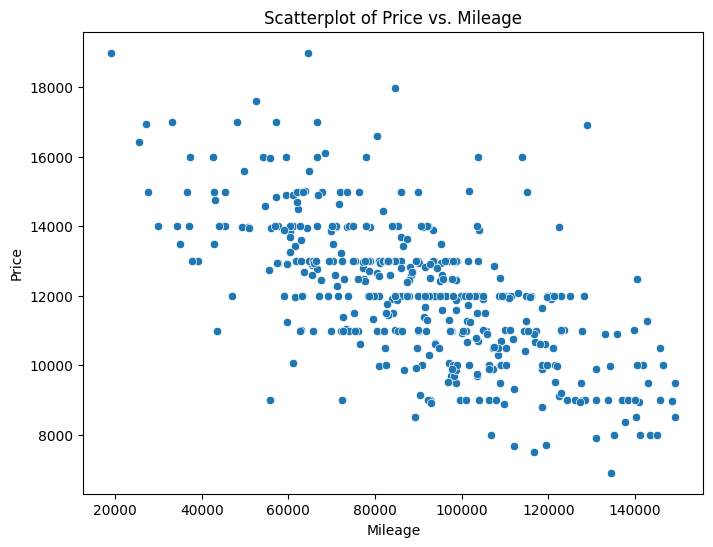

In [6]:
# Scatter plot to show the joint distribution of price and mileage
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mileage', y='price', data=df)
plt.title('Scatterplot of Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [8]:
# Calculate mean and standard deviation for price and mileage
price_mean = df['price'].mean()
price_std = df['price'].std()

mileage_mean = df['mileage'].mean()
mileage_std = df['mileage'].std()

# Add new columns to identify outliers
df['isOutlierPrice'] = ((df['price'] > (price_mean + 2 * price_std)) | (df['price'] < (price_mean - 2 * price_std))).astype(int)
df['isOutlierMileage'] = ((df['mileage'] > (mileage_mean + 2 * mileage_std)) | (df['mileage'] < (mileage_mean - 2 * mileage_std))).astype(int)

# Display the updated dataframe
df.head()

,price,mileage,year,trim,engine,transmission,isOutlierPrice,isOutlierMileage
0,14995,67697,2006,ex,4 Cyl,Manual,0,0
1,11988,73738,2006,ex,4 Cyl,Manual,0,0
2,11999,80313,2006,lx,4 Cyl,Automatic,0,0
3,12995,86096,2006,lx,4 Cyl,Automatic,0,0
4,11333,79607,2006,lx,4 Cyl,Automatic,0,0


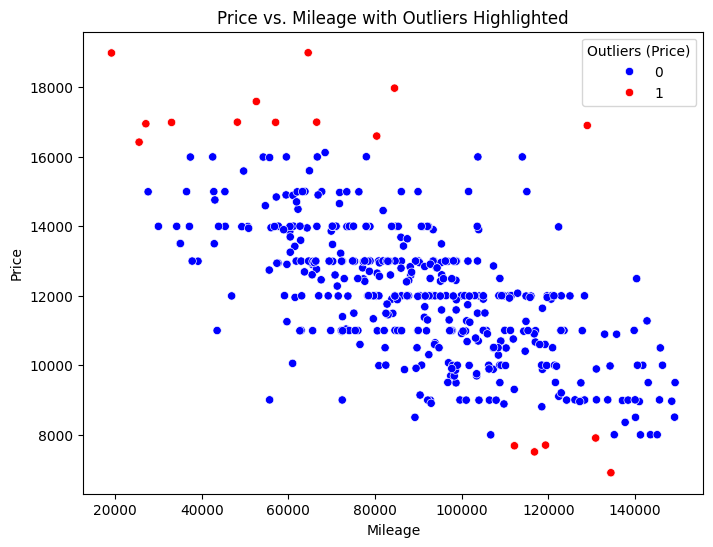

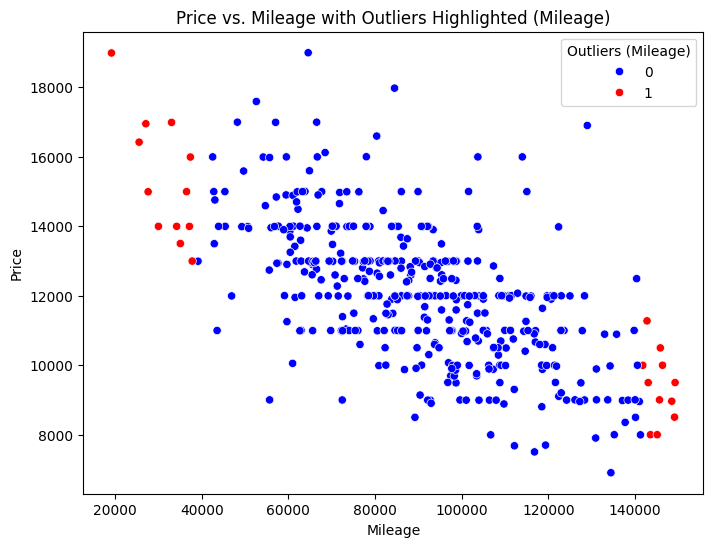

In [10]:
# Scatter plot showing outliers in a different color
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mileage', y='price', hue='isOutlierPrice', data=df, palette=['blue', 'red'])
plt.title('Price vs. Mileage with Outliers Highlighted')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(title='Outliers (Price)')
plt.show()

# Scatter plot showing outliers in a different color based on mileage
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mileage', y='price', hue='isOutlierMileage', data=df, palette=['blue', 'red'])
plt.title('Price vs. Mileage with Outliers Highlighted (Mileage)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(title='Outliers (Mileage)')
plt.show()

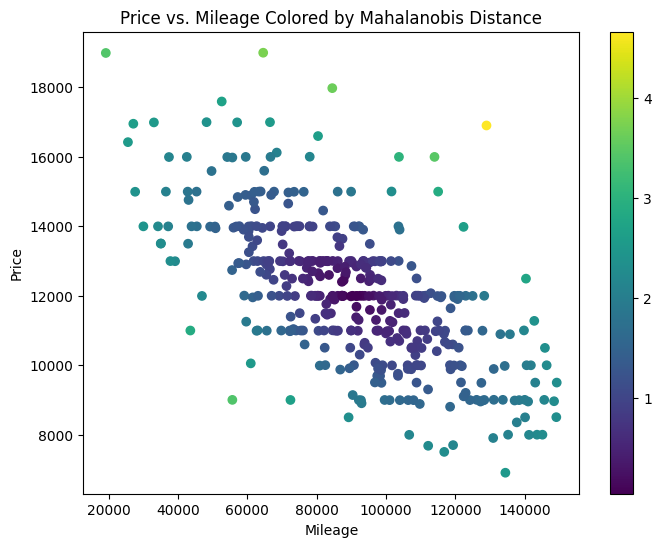

In [11]:
from scipy.spatial.distance import cdist
import numpy as np

# Calculate the 2D mean vector
mean_vector = np.array([df['mileage'].mean(), df['price'].mean()])

# Calculate covariance matrix and its inverse
cov_matrix = np.cov(df[['mileage', 'price']].T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Function to compute Mahalanobis distance
def mahalanobis_distance(x, mean, inv_cov):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff, inv_cov), diff.T))

# Compute Mahalanobis distance for each row
df['MahalanobisDistance'] = df.apply(lambda row: mahalanobis_distance(np.array([row['mileage'], row['price']]), mean_vector, inv_cov_matrix), axis=1)

# Scatter plot with color based on Mahalanobis Distance
plt.figure(figsize=(8, 6))
sc = plt.scatter(df['mileage'], df['price'], c=df['MahalanobisDistance'], cmap='viridis')
plt.colorbar(sc)
plt.title('Price vs. Mileage Colored by Mahalanobis Distance')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()